In [ ]:
import tensorflow as tf

# Load the Fashion MNIST dataset
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()

print("Fashion MNIST dataset loaded successfully.")
print(f"Training images shape: {train_images.shape}")
print(f"Training labels shape: {train_labels.shape}")
print(f"Test images shape: {test_images.shape}")
print(f"Test labels shape: {test_labels.shape}")

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Fashion MNIST dataset loaded successfully.
Training images shape: (60000, 28, 28)
Training labels shape: (60000,)
Test images shape: (10000, 28, 28)
Test labels shape: (10000,)


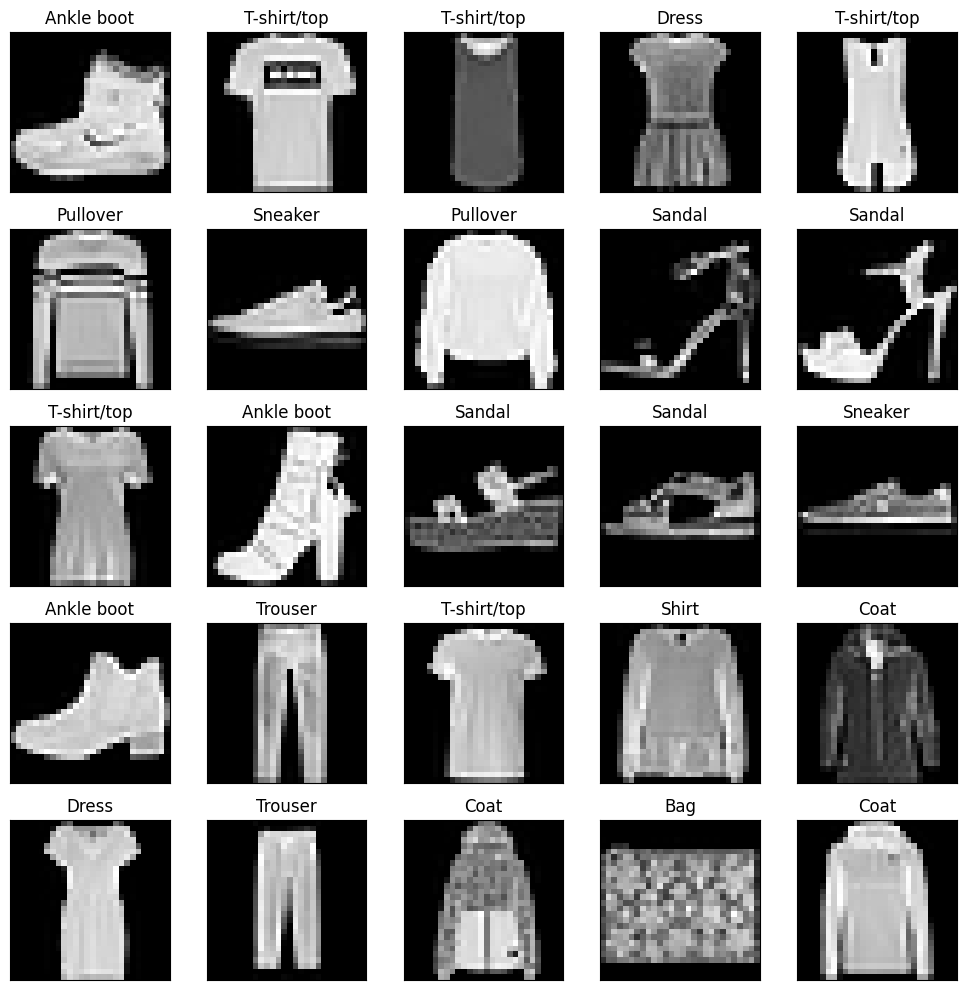

Training images shape: (60000, 28, 28)
Training labels shape: (60000,)
Test images shape: (10000, 28, 28)
Test labels shape: (10000,)
Unique labels in training set: [0 1 2 3 4 5 6 7 8 9]
Unique labels in test set: [0 1 2 3 4 5 6 7 8 9]


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 1. Define a list of class names
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# 3. Create a figure with a grid of subplots (5x5)
plt.figure(figsize=(10,10))

# 4. Iterate through the first 25 training images
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([]) # Turn off x-axis ticks
    plt.yticks([]) # Turn off y-axis ticks
    plt.grid(False)
    # a. Display each image using plt.imshow(), applying a 'gray' colormap
    plt.imshow(train_images[i], cmap='gray')
    # b. Set the title of each subplot to the actual class name
    plt.title(class_names[train_labels[i]])

# 5. Use plt.tight_layout() to adjust subplot parameters for a tight layout
plt.tight_layout()
# 6. Display the plot using plt.show()
plt.show()

# Check data shapes (already printed in the previous cell, but good for verification if needed again)
print(f"Training images shape: {train_images.shape}")
print(f"Training labels shape: {train_labels.shape}")
print(f"Test images shape: {test_images.shape}")
print(f"Test labels shape: {test_labels.shape}")

# 7. Print the unique values present in train_labels and test_labels
print("Unique labels in training set:", np.unique(train_labels))
print("Unique labels in test set:", np.unique(test_labels))

In [ ]:
import numpy as np

# 1. Normalize pixel values to a range between 0 and 1
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

# 2. Reshape images to include a channel dimension
# For grayscale images, the channel dimension is 1
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))

print("Images normalized and reshaped successfully.")
print(f"New training images shape: {train_images.shape}")
print(f"New test images shape: {test_images.shape}")

Images normalized and reshaped successfully.
New training images shape: (60000, 28, 28, 1)
New test images shape: (10000, 28, 28, 1)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# 3. Instantiate a Sequential model
model = Sequential([
    # 4. Add convolutional layers (Conv2D) with appropriate filters, kernel size, activation function (e.g., 'relu'),
    # and input shape for the first layer (which should match the preprocessed image shape: (28, 28, 1)).
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    # 5. Add MaxPooling2D layers to reduce spatial dimensions.
    MaxPooling2D((2, 2)),
    # 6. Add more Conv2D and MaxPooling2D layers as desired to build a deeper network.
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    # 7. Flatten the output of the convolutional layers using a Flatten layer.
    Flatten(),
    # 8. Add one or more Dense layers with an activation function (e.g., 'relu').
    Dense(128, activation='relu'),
    # 9. Add a final Dense layer with 10 units (for 10 classes) and a 'softmax' activation function.
    Dense(10, activation='softmax')
])

# Display the model summary
model.summary()
print("CNN model built successfully.")

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 130,890 (511.29 KB)

 Trainable params: 130,890 (511.29 KB)

 Non-trainable params: 0 (0.00 B)

CNN model built successfully.


In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

print("Model compiled successfully.")

Model compiled successfully.


In [ ]:
history = model.fit(train_images, train_labels, epochs=10,
                    batch_size=32,
                    validation_data=(test_images, test_labels))

print("Model training complete. Training history stored in 'history' variable.")

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 66s 34ms/step - accuracy: 0.7547 - loss: 0.6644 - val_accuracy: 0.8696 - val_loss: 0.3548
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 61s 32ms/step - accuracy: 0.8813 - loss: 0.3218 - val_accuracy: 0.8911 - val_loss: 0.2979
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 62s 33ms/step - accuracy: 0.9013 - loss: 0.2655 - val_accuracy: 0.8999 - val_loss: 0.2761
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 33ms/step - accuracy: 0.9128 - loss: 0.2341 - val_accuracy: 0.9078 - val_loss: 0.2628
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 84s 34ms/step - accuracy: 0.9216 - loss: 0.2091 - val_accuracy: 0.9000 - val_loss: 0.2780
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 64s 34ms/step - accuracy: 0.9327 - loss: 0.1828 - val_accuracy: 0.9080 - val_loss: 0.2584
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 64s 34ms/step - accuracy: 0.9368 - loss: 0.1666 - val_accuracy: 0.9144 - val_loss: 0.2446
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 62s 33ms/step - accuracy: 0.9432 -

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 392,672 (1.50 MB)

 Trainable params: 130,890 (511.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 261,782 (1022.59 KB)

313/313 - 3s - 10ms/step - accuracy: 0.9094 - loss: 0.2805

Test loss: 0.2804781198501587
Test accuracy: 0.9093999862670898


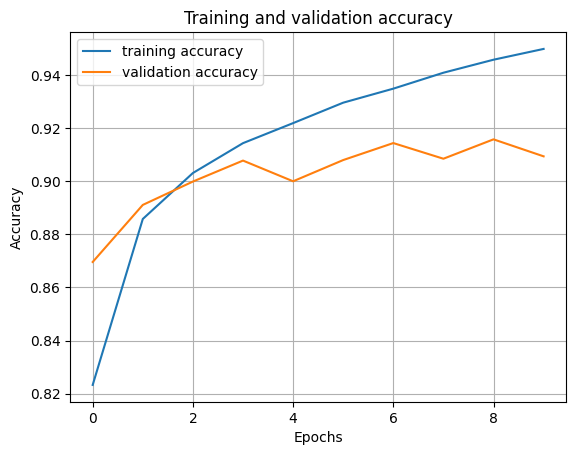

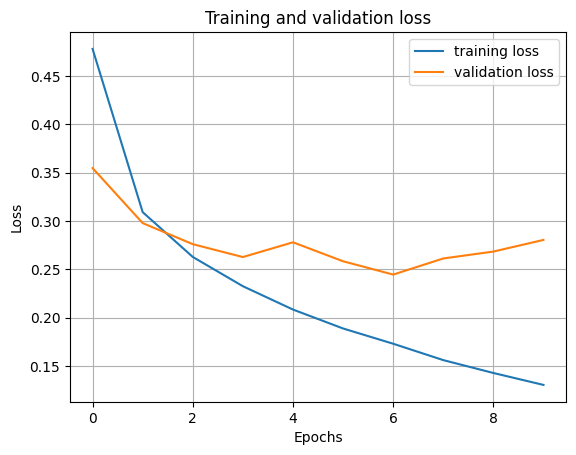

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 392,672 (1.50 MB)

 Trainable params: 130,890 (511.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 261,782 (1022.59 KB)

In [ ]:
import matplotlib.pyplot as plt

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print("\nTest loss:", test_loss)
print("Test accuracy:", test_acc)

plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title("Training and validation accuracy")
plt.grid(True)
plt.show()

plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and validation loss')
plt.grid(True)
plt.show()

model.summary()

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step


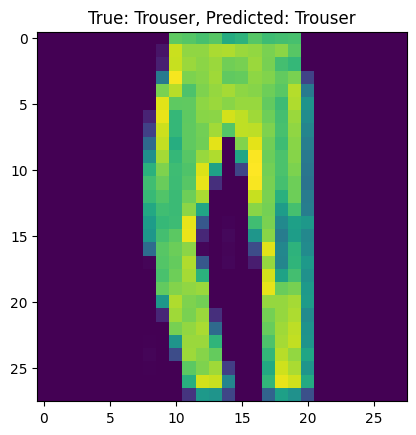

[2.57498124e-12 9.99999940e-01 1.04800101e-11 2.12163457e-13
 1.46388226e-15 9.16182004e-17 1.16046738e-11 7.86716718e-23
 1.42649295e-11 6.17515773e-21]


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
y_pred=model.predict(test_images)
plt.imshow(test_images[5])

true_label_index = test_labels[7]
predicted_label_index = np.argmax(y_pred[5])

true_label_name = class_names[true_label_index]
predicted_label_name = class_names[predicted_label_index]

plt.title(f"True: {true_label_name}, Predicted: {predicted_label_name}")

plt.show()
print(y_pred[5])